# Trabajo final 2024.
### Benitez Elisabet


#Installar e importar librerías.

In [1]:
#Installar liberías
!pip install rasterio
!pip install matplotlib
!pip install numpy

!pip install zipfile
!pip install os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 38.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
#Importar las librerías
import numpy as np
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt

import zipfile
import os

#Montar el Google drive donde se encuentra el archivo zip con las imágenes a trabajar.

In [4]:
#Montar el google drive que es donde se encuentra guardado el archivo zip.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Cargar y descomprimir el archivo zip

###La imagen a trabajar corresponde a una imagen satelital Landsat 8 del Embalse Los Molinos con fecha de febrero de 2024

In [ ]:
#Descomprimir el archivo zip
zip_path = '/content/drive/My Drive/Imagen_TrabajoFinal/Los-Molinos_2024-02-10_0_all_bands.zip'
extract_path = '/content/drive/My Drive/Imagen_TrabajoFinal/Archivo_descomprimido'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

#Extracción de las bandas necesarias para trabajar.

In [5]:
#Extracción/ separación de bandas
B3_Green = '/content/drive/My Drive/Imagen_TrabajoFinal/Archivo_descomprimido/2024-02-10.SR_B3.tif'
B4_Red = '/content/drive/My Drive/Imagen_TrabajoFinal/Archivo_descomprimido/2024-02-10.SR_B4.tif'
B5_NIR = '/content/drive/My Drive/Imagen_TrabajoFinal/Archivo_descomprimido/2024-02-10.SR_B5.tif'
B6_SWIR = '/content/drive/My Drive/Imagen_TrabajoFinal/Archivo_descomprimido/2024-02-10.SR_B6.tif'

#Análisis exploratorio de los datos y metadatos de la imagen.

(Identificar posibles outlier y enmascararlos a valores nan. Esto se planteó pero no se hizo. Es importante tener en cuenta que cuando se deben transformar los valores para generar un producto con estos mismos datos se deben hacer los análisis exploratorios y demás. Siempre se trabaja con los mismos datos para que los resultados sean comparables)

ANALISIS BANDA 3
Metadatos del dataset:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 298, 'height': 406, 'count': 1, 'crs': CRS.from_epsg(32620), 'transform': Affine(30.0, 0.0, 350325.0,
       0.0, -30.0, -3516975.0)}

Bounds:
BoundingBox(left=350325.0, bottom=-3529155.0, right=359265.0, top=-3516975.0)

Descripción:
(None,)

Estadísticas de la banda:
 - Mínimo: 4222.0
 - Máximo: 28590.0
 - Media: 9598.50390625
 - Mediana: 9552.0
 - Desviación estándar: 1561.11669921875


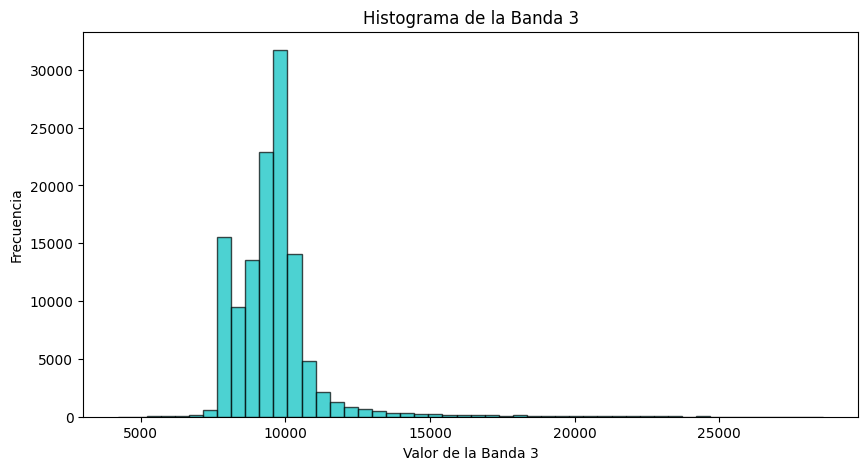

In [6]:
#Análisis de los metadatos
print(f"ANALISIS BANDA 3")

with rasterio.open(B3_Green) as dataset:
    print("Metadatos del dataset:")
    print(dataset.meta)

    # Mostrar los límites geográficos
    print("\nBounds:")
    print(dataset.bounds)

    # Mostrar la descripción del dataset
    print("\nDescripción:")
    print(dataset.descriptions)

def analyze_band(band_data):
    print("\nEstadísticas de la banda:")
    print(f" - Mínimo: {np.min(band_data)}")
    print(f" - Máximo: {np.max(band_data)}")
    print(f" - Media: {np.mean(band_data)}")
    print(f" - Mediana: {np.median(band_data)}")
    print(f" - Desviación estándar: {np.std(band_data)}")

    # Histograma de la banda
    plt.figure(figsize=(10, 5))
    plt.hist(band_data.flatten(), bins=50, color='c', edgecolor='k', alpha=0.7)
    plt.title('Histograma de la Banda 3')
    plt.xlabel('Valor de la Banda 3')
    plt.ylabel('Frecuencia')
    plt.show()

with rasterio.open(B3_Green) as dataset:
    band_data = dataset.read(1)
    band_data = band_data.astype(np.float32)
    analyze_band(band_data)

    # Umbral para identificar outliers (por ejemplo, basado en la desviación estándar)
    umbral_superior = np.mean(band_data) + 2.5 * np.std(band_data)
    umbral_inferior = np.mean(band_data) - 2.5 * np.std(band_data)

    # Enmascarar outliers
    outliers_mask = (band_data > umbral_superior) | (band_data < umbral_inferior)
    band_data[outliers_mask] = np.nan



ANALISIS BANDA 4
Metadatos del dataset:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 298, 'height': 406, 'count': 1, 'crs': CRS.from_epsg(32620), 'transform': Affine(30.0, 0.0, 350325.0,
       0.0, -30.0, -3516975.0)}

Bounds:
BoundingBox(left=350325.0, bottom=-3529155.0, right=359265.0, top=-3516975.0)

Descripción:
(None,)

Estadísticas de la banda:
 - Mínimo: 4210.0
 - Máximo: 29001.0
 - Media: 9439.5185546875
 - Mediana: 9316.0
 - Desviación estándar: 1732.208740234375


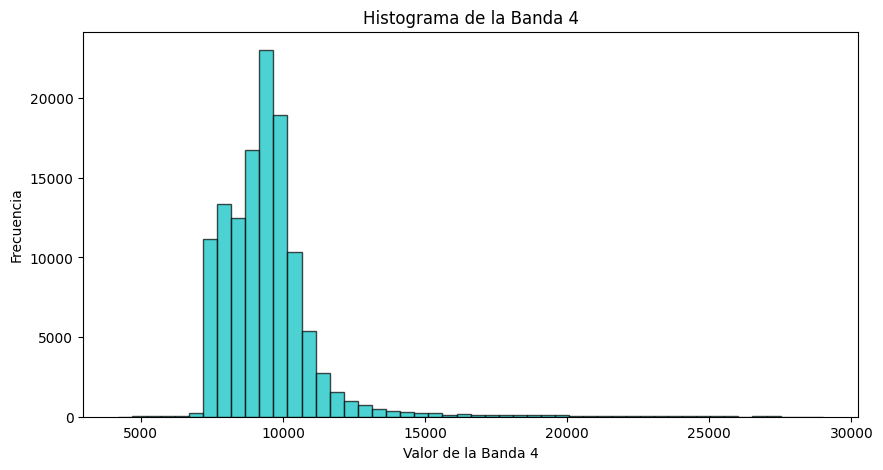

In [7]:
#Análisis de los metadatos
print(f"ANALISIS BANDA 4")

with rasterio.open(B4_Red) as dataset:
    print("Metadatos del dataset:")
    print(dataset.meta)

    # Mostrar los límites geográficos
    print("\nBounds:")
    print(dataset.bounds)

    # Mostrar la descripción del dataset
    print("\nDescripción:")
    print(dataset.descriptions)

def analyze_band(band_data):
    print("\nEstadísticas de la banda:")
    print(f" - Mínimo: {np.min(band_data)}")
    print(f" - Máximo: {np.max(band_data)}")
    print(f" - Media: {np.mean(band_data)}")
    print(f" - Mediana: {np.median(band_data)}")
    print(f" - Desviación estándar: {np.std(band_data)}")

    # Histograma de la banda
    plt.figure(figsize=(10, 5))
    plt.hist(band_data.flatten(), bins=50, color='c', edgecolor='k', alpha=0.7)
    plt.title('Histograma de la Banda 4')
    plt.xlabel('Valor de la Banda 4')
    plt.ylabel('Frecuencia')
    plt.show()

with rasterio.open(B4_Red) as dataset:
    band_data = dataset.read(1)
    band_data = band_data.astype(np.float32)
    analyze_band(band_data)

    # Umbral para identificar outliers (por ejemplo, basado en la desviación estándar)
    umbral_superior = np.mean(band_data) + 2.5 * np.std(band_data)
    umbral_inferior = np.mean(band_data) - 2.5 * np.std(band_data)

    # Enmascarar outliers (debería ser en base a los limites que dice la documentación: 1 - 65.000 y eliminar los umbrales calculados anteriormente)
    outliers_mask = (band_data > umbral_superior) | (band_data < umbral_inferior)
    band_data[outliers_mask] = np.nan

ANALISIS BANDA 5
Metadatos del dataset:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 298, 'height': 406, 'count': 1, 'crs': CRS.from_epsg(32620), 'transform': Affine(30.0, 0.0, 350325.0,
       0.0, -30.0, -3516975.0)}

Bounds:
BoundingBox(left=350325.0, bottom=-3529155.0, right=359265.0, top=-3516975.0)

Descripción:
(None,)

Estadísticas de la banda:
 - Mínimo: 6035.0
 - Máximo: 32560.0
 - Media: 15810.4521484375
 - Mediana: 17064.0
 - Desviación estándar: 4146.41796875


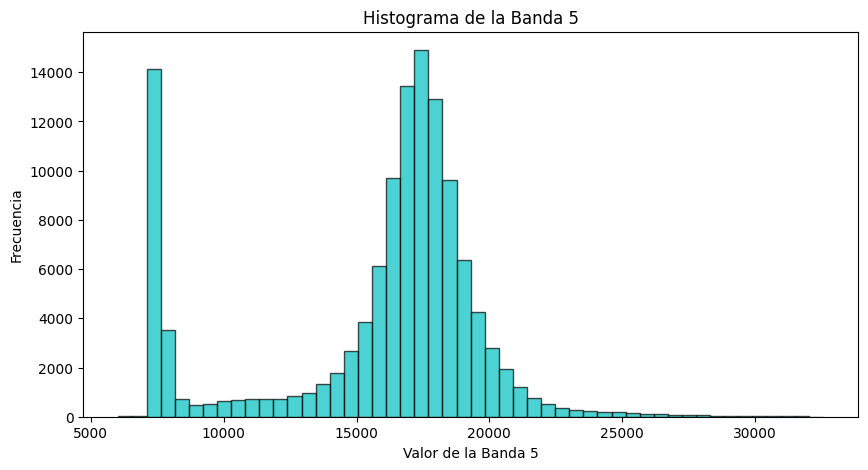

In [8]:
#Análisis de los metadatos
print(f"ANALISIS BANDA 5")

with rasterio.open(B5_NIR) as dataset:
    print("Metadatos del dataset:")
    print(dataset.meta)

    # Mostrar los límites geográficos
    print("\nBounds:")
    print(dataset.bounds)

    # Mostrar la descripción del dataset
    print("\nDescripción:")
    print(dataset.descriptions)

def analyze_band(band_data):
    print("\nEstadísticas de la banda:")
    print(f" - Mínimo: {np.min(band_data)}")
    print(f" - Máximo: {np.max(band_data)}")
    print(f" - Media: {np.mean(band_data)}")
    print(f" - Mediana: {np.median(band_data)}")
    print(f" - Desviación estándar: {np.std(band_data)}")

    # Histograma de la banda
    plt.figure(figsize=(10, 5))
    plt.hist(band_data.flatten(), bins=50, color='c', edgecolor='k', alpha=0.7)
    plt.title('Histograma de la Banda 5')
    plt.xlabel('Valor de la Banda 5')
    plt.ylabel('Frecuencia')
    plt.show()

with rasterio.open(B5_NIR) as dataset:
    band_data = dataset.read(1)
    band_data = band_data.astype(np.float32)
    analyze_band(band_data)

    # Umbral para identificar outliers (por ejemplo, basado en la desviación estándar)
    umbral_superior = np.mean(band_data) + 2.5 * np.std(band_data)
    umbral_inferior = np.mean(band_data) - 2.5 * np.std(band_data)

    # Enmascarar outliers (debería ser en base a los limites que dice la documentación: 1 - 65.000 y eliminar los umbrales calculados anteriormente)
    outliers_mask = (band_data > umbral_superior) | (band_data < umbral_inferior)
    band_data[outliers_mask] = np.nan

ANALISIS BANDA 6
Metadatos del dataset:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 298, 'height': 406, 'count': 1, 'crs': CRS.from_epsg(32620), 'transform': Affine(30.0, 0.0, 350325.0,
       0.0, -30.0, -3516975.0)}

Bounds:
BoundingBox(left=350325.0, bottom=-3529155.0, right=359265.0, top=-3516975.0)

Descripción:
(None,)

Estadísticas de la banda:
 - Mínimo: 7069.0
 - Máximo: 31252.0
 - Media: 13881.7255859375
 - Mediana: 14760.0
 - Desviación estándar: 3616.240478515625


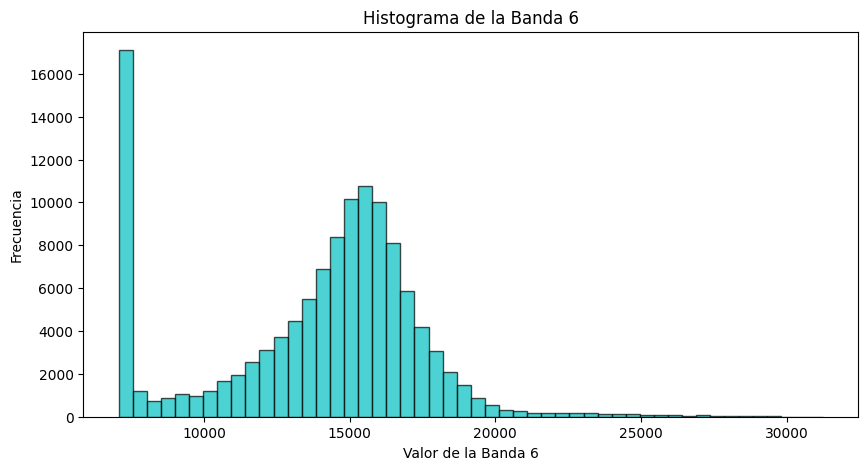

In [9]:
#Análisis de los metadatos
print(f"ANALISIS BANDA 6")

with rasterio.open(B6_SWIR) as dataset:
    print("Metadatos del dataset:")
    print(dataset.meta)

    # Mostrar los límites geográficos
    print("\nBounds:")
    print(dataset.bounds)

    # Mostrar la descripción del dataset
    print("\nDescripción:")
    print(dataset.descriptions)

def analyze_band(band_data):
    print("\nEstadísticas de la banda:")
    print(f" - Mínimo: {np.min(band_data)}")
    print(f" - Máximo: {np.max(band_data)}")
    print(f" - Media: {np.mean(band_data)}")
    print(f" - Mediana: {np.median(band_data)}")
    print(f" - Desviación estándar: {np.std(band_data)}")

    # Histograma de la banda
    plt.figure(figsize=(10, 5))
    plt.hist(band_data.flatten(), bins=50, color='c', edgecolor='k', alpha=0.7)
    plt.title('Histograma de la Banda 6')
    plt.xlabel('Valor de la Banda 6')
    plt.ylabel('Frecuencia')
    plt.show()

with rasterio.open(B6_SWIR) as dataset:
    band_data = dataset.read(1)
    band_data = band_data.astype(np.float32)
    analyze_band(band_data)

    # Umbral para identificar outliers (por ejemplo, basado en la desviación estándar)
    umbral_superior = np.mean(band_data) + 2.5 * np.std(band_data)
    umbral_inferior = np.mean(band_data) - 2.5 * np.std(band_data)

    # Enmascarar outliers (debería ser en base a los limites que dice la documentación: 1 - 65.000 y eliminar los umbrales calculados anteriormente)
    outliers_mask = (band_data > umbral_superior) | (band_data < umbral_inferior)
    band_data[outliers_mask] = np.nan

#Cálculo MNDWI y máscara.

  Se calcula este índice con el objetivo de poder separar las coberturas agua de no agua, y así poder enmascarar y extraer información solo del lago (área de interés). Para hacer el cálculo del índice y aplicar la máscara se deben convertir los datos que están en enteros a valores de punto flotante.

In [10]:
#Transformación a valores de punto flotante
B3_Green_Im = rasterio.open(B3_Green).read(1).astype(np.float32)
B6_SWIR_Im = rasterio.open(B6_SWIR).read(1).astype(np.float32)

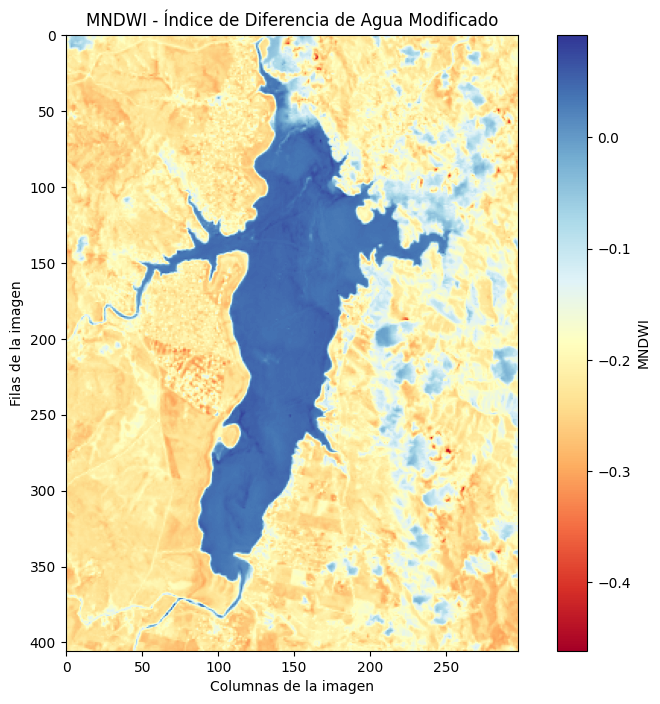

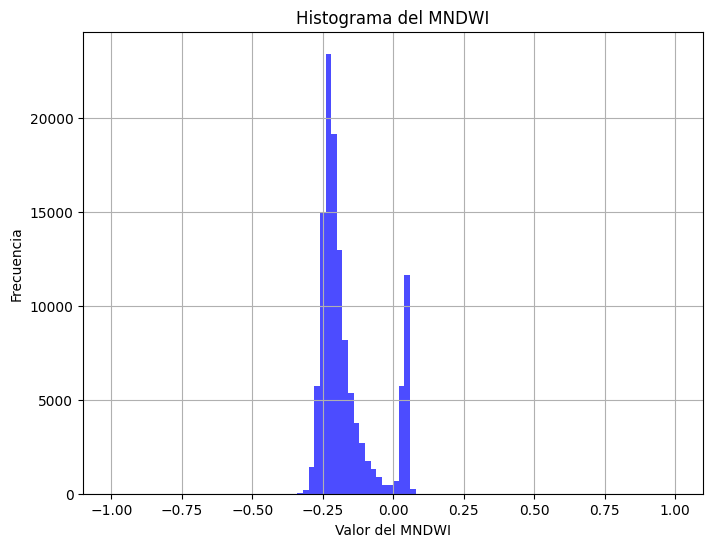

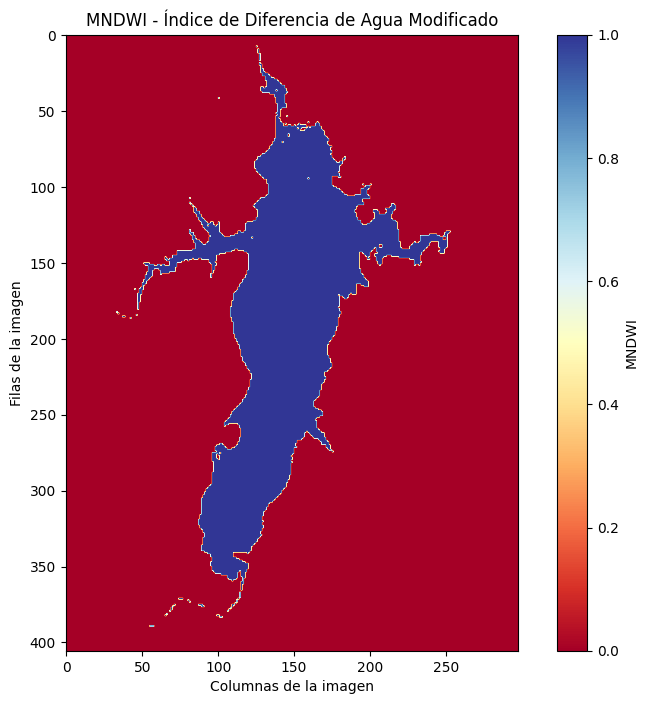

In [12]:
#Cálculo de MNDWI- MNDWI=(GREEN-SWIR/GREEN+SWIR)
# Función para calcular MNDWI
def calcular_mndwi(verde, SWIR):
    return (verde - SWIR) / (verde + SWIR)

# Calcular MNDWI
mndwi = calcular_mndwi(B3_Green_Im , B6_SWIR_Im)


# Mostrar la imagen del MNDWI
plt.figure(figsize=(10, 8))
plt.imshow(mndwi, cmap='RdYlBu')  # Utiliza un colormap para visualizar el MNDWI
plt.colorbar(label='MNDWI')
plt.title('MNDWI - Índice de Diferencia de Agua Modificado')
plt.xlabel('Columnas de la imagen')
plt.ylabel('Filas de la imagen')
plt.show()

# Mostrar el histograma del MNDWI
plt.figure(figsize=(8, 6))
plt.hist(mndwi.ravel(), bins=100, range=(-1, 1), color='b', alpha=0.7)
plt.title('Histograma del MNDWI')
plt.xlabel('Valor del MNDWI')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Definir una máscara para seleccionar solo las áreas de agua
umbral_mndwi = 0  # Umbral para determinar qué píxeles son agua (definido luego de mirar el histograma)
mascara_agua = mndwi > umbral_mndwi

# Aplicar la máscara para obtener solo las áreas de agua
agua = np.where(mascara_agua, 1, 0)

# Mostrar la imagen del MNDWI
plt.figure(figsize=(10, 8))
plt.imshow(agua, cmap='RdYlBu')  # Utiliza un colormap para visualizar el MNDWI
plt.colorbar(label='MNDWI')
plt.title('MNDWI - Índice de Diferencia de Agua Modificado')
plt.xlabel('Columnas de la imagen')
plt.ylabel('Filas de la imagen')
plt.show()



#Eliminación de nubes.

In [13]:
QA_band = '/content/drive/My Drive/Imagen_TrabajoFinal/Archivo_descomprimido/2024-02-10.QA_PIXEL.tif'

In [14]:
QA_band = rasterio.open(QA_band).read(1)

In [15]:
print(f"Shape de QA band: {QA_band.shape}")

Shape de QA band: (406, 298)


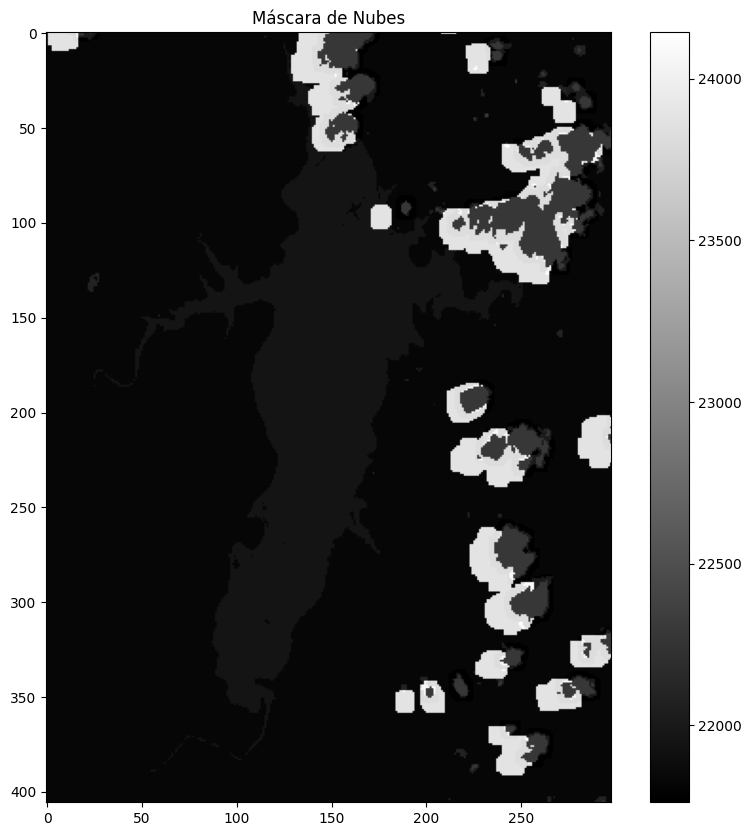

In [16]:
# Mostrar la máscara de nubes
plt.figure(figsize=(10, 10))
plt.imshow(QA_band, cmap='gray')
plt.title('Máscara de Nubes')
plt.colorbar()
plt.show()

In [18]:
def extract_bits(value, bit_start, bit_length):
    bits = bin(value)[2:].zfill(16)
    return int(bits[-bit_start - bit_length: -bit_start], 2)

def is_cloud(value):
    # Definir los bits específicos para detectar nubes (consultar la documentación del satélite)
    cloud_bit = extract_bits(value, 4, 1)  # Ejemplo: Bit 4 indica la presencia de nubes
    return cloud_bit == 1

import numpy as np

def create_cloud_mask(qa_band):
    cloud_mask = np.zeros_like(qa_band, dtype=np.uint8)
    for row in range(qa_band.shape[0]):
        for col in range(qa_band.shape[1]):
            if is_cloud(qa_band[row, col]):
                cloud_mask[row, col] = 1
    return cloud_mask


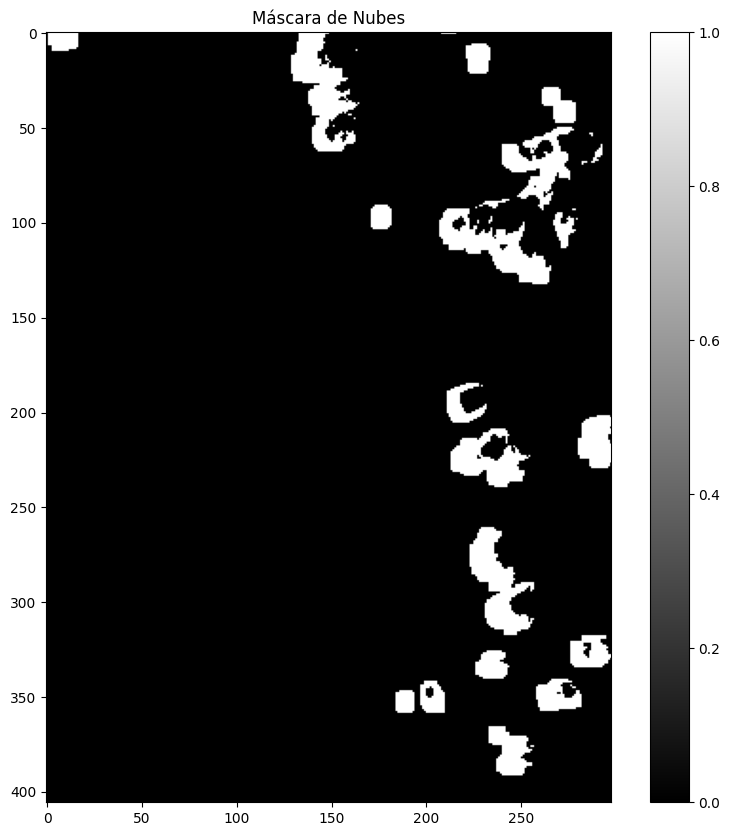

In [19]:
# Crear la máscara de nubes a partir de la banda QA
Mascara_nubes = create_cloud_mask(QA_band)

# Mostrar la máscara de nubes
plt.figure(figsize=(10, 10))
plt.imshow(Mascara_nubes, cmap='gray')
plt.title('Máscara de Nubes')
plt.colorbar()
plt.show()

In [20]:
B4_Red_Im = rasterio.open(B4_Red).read(1).astype(np.float32)
B5_NIR_Im = rasterio.open(B5_NIR).read(1).astype(np.float32)

In [21]:
# Aplicar la máscara de nubes
nir_band_masked = np.where(Mascara_nubes == 1, np.nan, B5_NIR_Im)
red_band_masked = np.where(Mascara_nubes == 1, np.nan, B4_Red_Im)

#Cálculo de NDVI en el área de estudio.
  
  Se hace el cálculo del NDVI para toda la imagen y luego filtro el resultado a través de la máscara. El NDVI se calcula con las nuevas bandas de las que se extrajo las nubes.

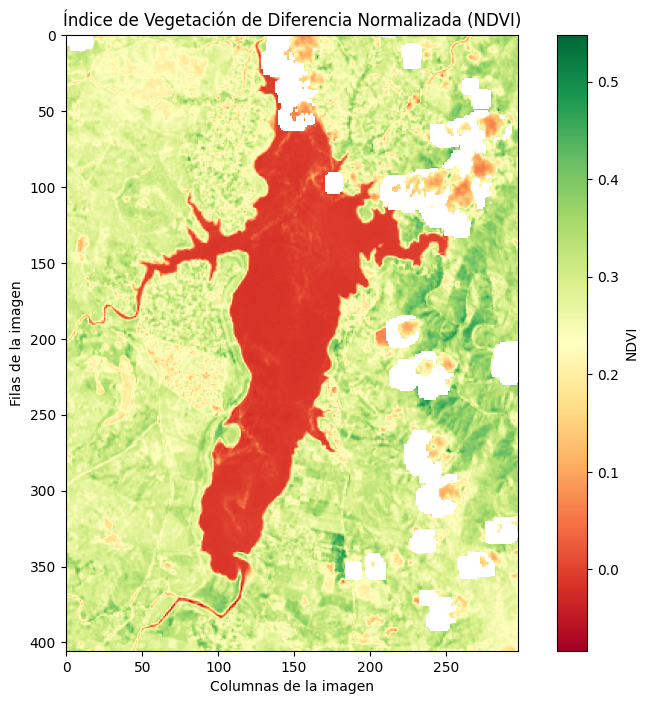

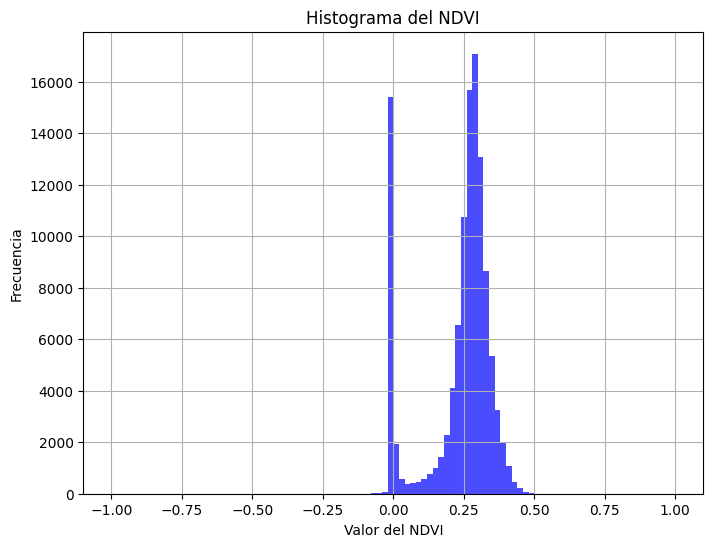

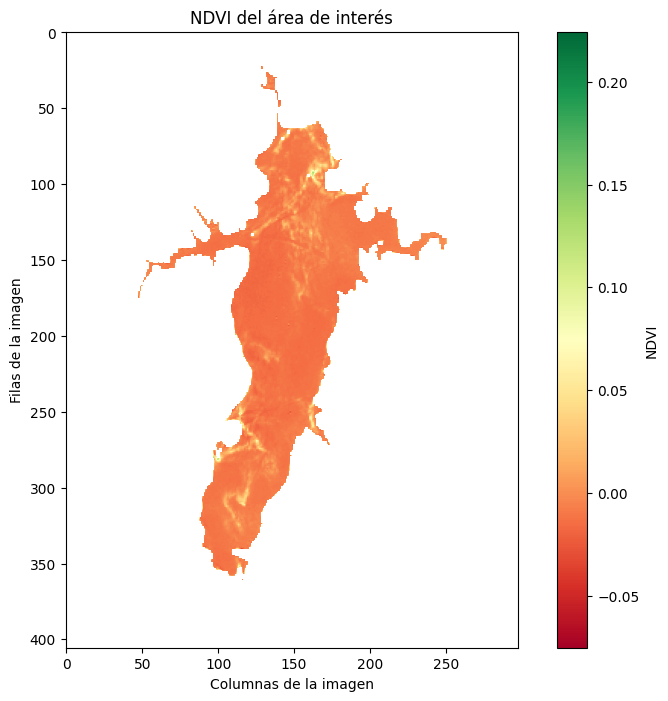

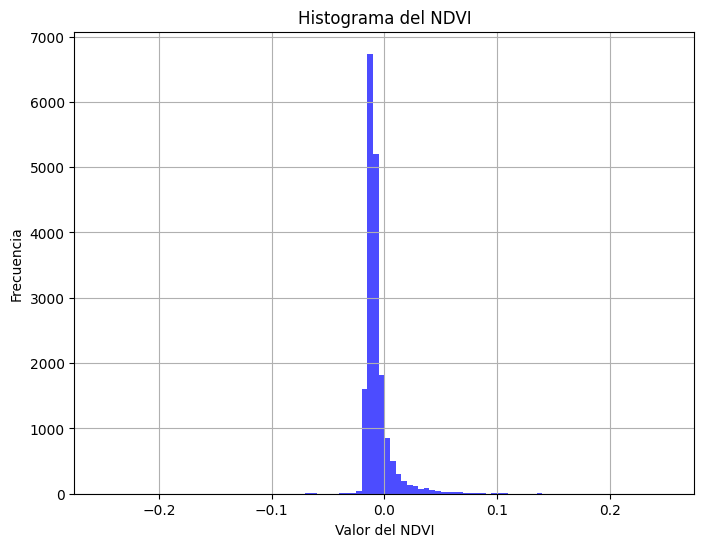

In [35]:
# Función para calcular NDVI
def calcular_ndvi(rojo, infrarrojo):
    ndvi = (infrarrojo - rojo) / (infrarrojo + rojo)
    return ndvi


# Calcular NDVI para toda la imagen
ndvi = calcular_ndvi(red_band_masked, nir_band_masked)

# Visualizar la imagen del NDVI
plt.figure(figsize=(10, 8))
plt.imshow(ndvi, cmap='RdYlGn')  # Colormap RdYlGn para resaltar la vegetación
plt.colorbar(label='NDVI')
plt.title('Índice de Vegetación de Diferencia Normalizada (NDVI)')
plt.xlabel('Columnas de la imagen')
plt.ylabel('Filas de la imagen')
plt.show()

# Mostrar el histograma del NDVI
plt.figure(figsize=(8, 6))
plt.hist(ndvi.ravel(), bins=100, range=(-1, 1), color='b', alpha=0.7)
plt.title('Histograma del NDVI')
plt.xlabel('Valor del NDVI')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



# Aplicar la máscara al NDVI para obtener solo la zona de interés
ndvi_zona_interes = np.where(agua == 1, ndvi, np.nan)

# Visualizar NDVI en un gráfico
plt.figure(figsize=(10, 8))
plt.imshow(ndvi_zona_interes, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI del área de interés')
plt.xlabel('Columnas de la imagen')
plt.ylabel('Filas de la imagen')
plt.show()

# Mostrar el histograma del NDVI de la zona de interés
plt.figure(figsize=(8, 6))
plt.hist(ndvi_zona_interes.ravel(), bins=100, range=(-0.25, 0.25), color='b', alpha=0.7)
plt.title('Histograma del NDVI')
plt.xlabel('Valor del NDVI')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#Exportar la imagen de NDVI del área de estudio

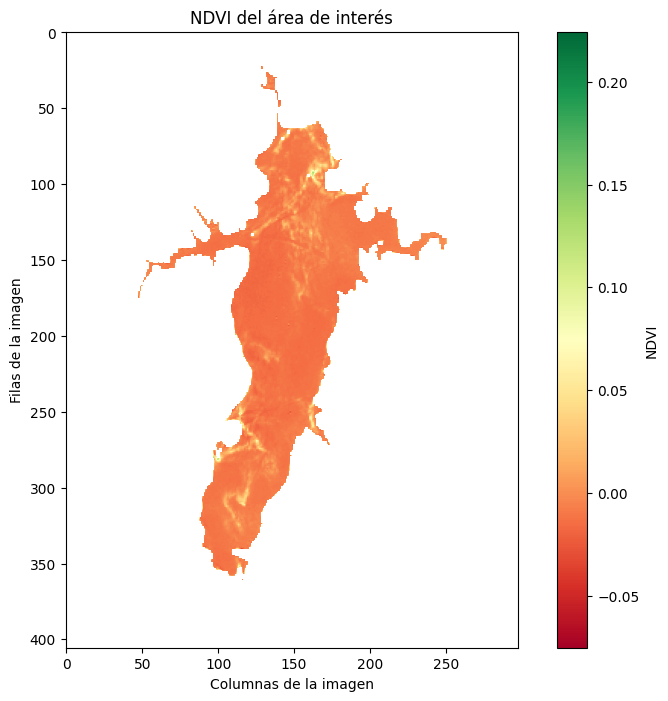

In [37]:
NDVI_Final = plt.figure(figsize=(10, 8))
plt.imshow(ndvi_zona_interes, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI del área de interés')
plt.xlabel('Columnas de la imagen')
plt.ylabel('Filas de la imagen')
NDVI_Final.savefig('/content/drive/My Drive/Imagen_TrabajoFinal/NDVI_2024-02-10_L8.tif', dpi=600)
plt.show()